In [1]:
import pandas as pd
import sys
import os

utils_path = os.path.abspath('../dataset/Empty')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from utils import *

In [2]:
file_path = '../dataset/Empty/101_DT_1JU1512_20250703031424.csv'
origin_df = pd.read_csv(file_path, encoding = 'cp949')

In [3]:
# df : 전처리된 df
df = preprocess_df(origin_df)

In [4]:
df

,행정구역별(시군구),결합행정구역,주택의 종류별,항목,2022 년,2023 년
0,서울특별시,서울특별시,계,주택_계,100706,107681
20,서울특별시,서울특별시,단독주택,주택_계,3299,4270
40,서울특별시,서울특별시,아파트,주택_계,53654,55087
60,서울특별시,서울특별시,연립주택,주택_계,5922,6537
80,서울특별시,서울특별시,다세대주택,주택_계,36317,40183
...,...,...,...,...,...,...
33614,서귀포시,제주특별자치도 서귀포시,단독주택,주택_계,3463,3812
33634,서귀포시,제주특별자치도 서귀포시,아파트,주택_계,2775,3136
33654,서귀포시,제주특별자치도 서귀포시,연립주택,주택_계,3215,3433
33674,서귀포시,제주특별자치도 서귀포시,다세대주택,주택_계,1763,1865


In [5]:
# 상위 레벨 행정구역의 미거주 주택수
sum_df = sum_upper_region(df)

In [6]:
sum_df

,행정구역별(시군구),결합행정구역,주택의 종류별,항목,2022 년,2023 년
0,서울특별시,서울특별시,계,주택_계,100706,107681
1,부산광역시,부산광역시,계,주택_계,110500,114245
2,대구광역시,대구광역시,계,주택_계,43086,56673
3,인천광역시,인천광역시,계,주택_계,72036,84414
4,광주광역시,광주광역시,계,주택_계,39205,40588
5,대전광역시,대전광역시,계,주택_계,26262,25396
6,울산광역시,울산광역시,계,주택_계,29569,30900
7,세종특별자치시,세종특별자치시,계,주택_계,12388,13019
8,경기도,경기도,계,주택_계,262266,286140
9,강원특별자치도,강원특별자치도,계,주택_계,80609,82552


In [7]:
fig = plot_empty_upper(sum_df, title ='상위행정구역별_빈집_수' ,save=True)
fig.show()

✅ 그래프가 HTML로 저장되었습니다: ./plot/상위행정구역별_빈집_수.html


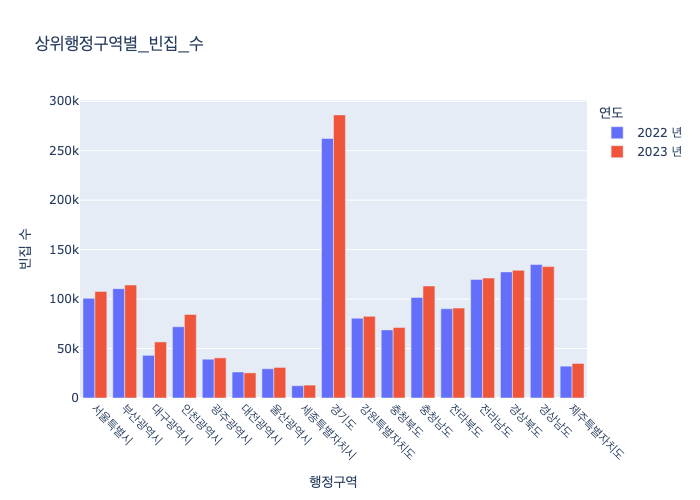

In [8]:
# png 출력용 - 깃에서 보기위함
pio.show(fig, renderer="png")

In [9]:
# sub_df 하위 행정구역 단위 데이터
sub_df = df[df['행정구역별(시군구)']!=df['결합행정구역']]
sub_df['2023 년'] = pd.to_numeric(sub_df['2023 년'], errors='coerce')
sub_df_sorted = sub_df.sort_values(by='2023 년', ascending=False)

/var/folders/6m/0y3_kg5x2sx85_03lp89vlt80000gn/T/ipykernel_14031/86922649.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
filter_df = sub_df_sorted[sub_df_sorted['주택의 종류별']=='계'].head(10)
filter_df

,행정구역별(시군구),결합행정구역,주택의 종류별,항목,2022 년,2023 년
12240,평택시,경기도 평택시,계,주택_계,30314,32009.0
18840,청주시,충청북도 청주시,계,주택_계,24312,25668.0
31434,창원시,경상남도 창원시,계,주택_계,25477,23794.0
15240,화성시,경기도 화성시,계,주택_계,23902,23201.0
33474,제주시,제주특별자치도 제주시,계,주택_계,20678,22370.0
20520,천안시,충청남도 천안시,계,주택_계,20139,21712.0
27480,포항시,경상북도 포항시,계,주택_계,19996,21180.0
21120,아산시,충청남도 아산시,계,주택_계,16014,20598.0
22680,전주시,전라북도 전주시,계,주택_계,20238,19471.0
23040,군산시,전라북도 군산시,계,주택_계,18331,18335.0


In [11]:
fig = plot_empty_upper(filter_df, title='하위 행정구역별 빈집 수(상위 10개)', save=False)
fig.show()

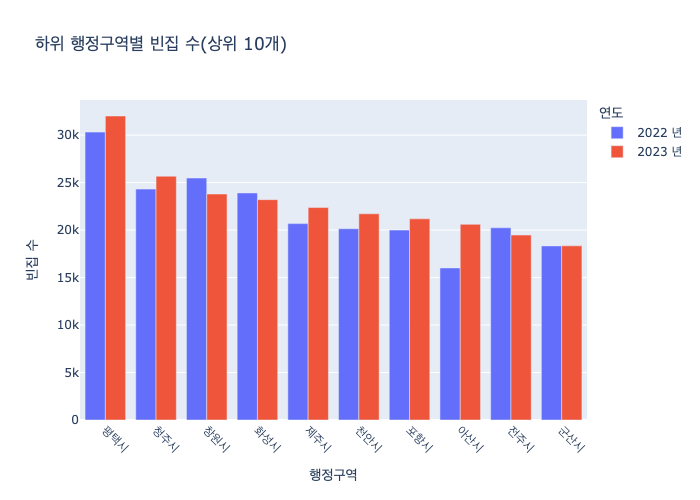

In [12]:
# png 출력용 - 깃에서 보기위함
pio.show(fig, renderer="png")

In [13]:
fig = plot_bar_by_house_type_split_by_year(df)
fig.show()


✅ 그래프가 HTML로 저장되었습니다: ./plot/상위 10개 지역(2023년 기준)의 주택 유형별 주택 수.html


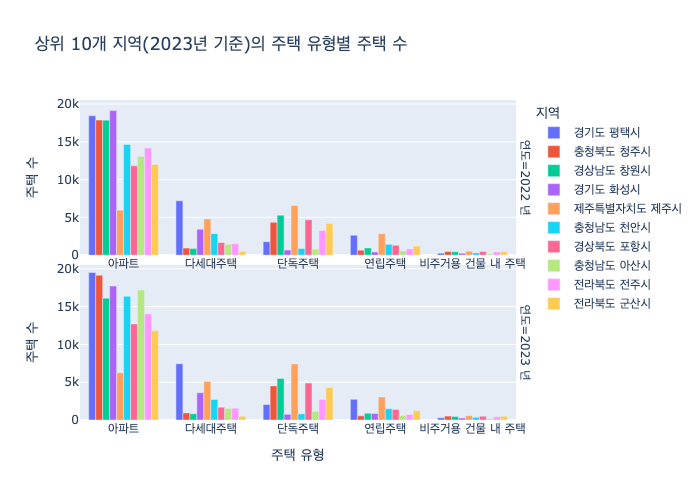

In [14]:
# png 출력용 - 깃에서 보기위함
pio.show(fig, renderer="png")